In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Generate synthetic data
def generate_data(n_samples=1000):
    X = np.linspace(-3, 3, n_samples)
    y = np.sin(X) + np.random.normal(0, 0.1, n_samples)
    return X, y

X, y = generate_data()
X = X.reshape(-1, 1)

In [3]:
# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(1,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.01), loss='mse')
    return model

c:\Users\segun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


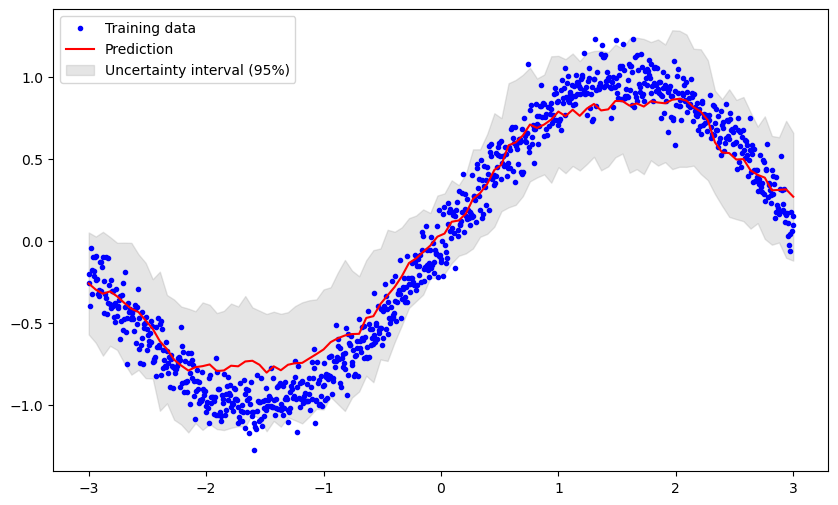

In [4]:
# Train the model
model = create_model()
model.fit(X, y, epochs=300, batch_size=32, verbose=0)

# Function to perform MC Dropout
def predict_with_uncertainty(f, x, n_iter=100):
    result = np.zeros((n_iter, x.shape[0]))
    for i in range(n_iter):
        result[i, :] = f(x, training=True).numpy().flatten()
    prediction = result.mean(axis=0)
    uncertainty = result.std(axis=0)
    return prediction, uncertainty

# Test data
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)

# Get predictions and uncertainties
y_pred, y_uncertainty = predict_with_uncertainty(model, X_test)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Training data')
plt.plot(X_test, y_pred, 'r-', label='Prediction')
plt.fill_between(X_test.flatten(), 
                 y_pred - 1.96 * y_uncertainty, 
                 y_pred + 1.96 * y_uncertainty, 
                 color='gray', alpha=0.2, label='Uncertainty interval (95%)')
plt.legend()
plt.show()

In [6]:
# importing MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape the input data
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Define the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Function to perform MC Dropout
def predict_with_uncertainty(f, x, n_iter=100):
    result = np.zeros((n_iter, x.shape[0], 10))
    for i in range(n_iter):
        result[i, :, :] = f(x, training=True).numpy()
    prediction = result.mean(axis=0)
    uncertainty = result.std(axis=0)
    return prediction, uncertainty

# Get predictions and uncertainties
y_pred, y_uncertainty = predict_with_uncertainty(model, X_test)

# Calculate the accuracy
accuracy = np.mean(np.equal(y_pred.argmax(axis=-1), y_test.argmax(axis=-1)))
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6344 - loss: 1.1134 - val_accuracy: 0.8974 - val_loss: 0.4230
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7410 - loss: 0.8402 - val_accuracy: 0.8945 - val_loss: 0.4442
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7296 - loss: 0.8686 - val_accuracy: 0.8781 - val_loss: 0.4074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7266 - loss: 0.8470 - val_accuracy: 0.8889 - val_loss: 0.4279
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7250 - loss: 0.8610 - val_accuracy: 0.8868 - val_loss: 0.4100
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7349 - loss: 0.8272 - val_accuracy: 0.8876 - val_loss: 0.3871
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7378 - loss: 0.8196 - val_accuracy: 0.8918 - val_loss: 0.4160
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7367 - loss: 0.8287 - 

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the neural network with dropout layers
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = create_model()
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Function to perform MC Dropout
def predict_with_uncertainty(model, x, n_iter=100):
    result = np.zeros((n_iter, x.shape[0], 10))
    for i in range(n_iter):
        # Use model.call instead of model.predict and pass training=True
        result[i, :, :] = model.call(x, training=True)
    prediction = result.mean(axis=0)
    uncertainty = result.std(axis=0)
    return prediction, uncertainty

# Evaluate uncertainty on test data
n_samples = 1000
x_test_sample = x_test[:n_samples]
y_test_sample = y_test[:n_samples]

y_pred, y_uncertainty = predict_with_uncertainty(model.predict, x_test_sample, n_iter=100)

# Visualize uncertainty for a few samples
def plot_uncertainty(x, y_true, y_pred, y_uncertainty, idx):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(x[idx].reshape(28, 28), cmap='gray')
    plt.title("Input")
    plt.subplot(1, 3, 2)
    plt.bar(range(10), y_pred[idx])
    plt.title("Predicted probabilities")
    plt.subplot(1, 3, 3)
    plt.bar(range(10), y_uncertainty[idx])
    plt.title("Uncertainty")
    plt.show()

for i in range(5):
    plot_uncertainty(x_test_sample, y_test_sample, y_pred, y_uncertainty, i)

# Evaluate accuracy and uncertainty
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_sample, axis=1)
accuracy = np.mean(y_pred_classes == y_true_classes)
mean_uncertainty = np.mean(y_uncertainty)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Mean Uncertainty: {mean_uncertainty:.4f}")


c:\Users\segun\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7571 - loss: 0.7388 - val_accuracy: 0.9761 - val_loss: 0.0764
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9603 - loss: 0.1341 - val_accuracy: 0.9851 - val_loss: 0.0481
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9712 - loss: 0.0945 - val_accuracy: 0.9884 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9761 - loss: 0.0792 - val_accuracy: 0.9878 - val_loss: 0.0335
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9794 - loss: 0.0681 - val_accuracy: 0.9895 - val_loss: 0.0312
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9896 - val_loss: 0.0291
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9842 - loss: 0.0521 - val_accuracy: 0.9904 - val_loss: 0.0264
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9848 - loss: 0.0500 - 

Traceback (most recent call last):
  File "C:\Users\segun\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\segun\AppData\Local\Temp\ipykernel_3420\3021441968.py", line 55, in <module>
    y_pred, y_uncertainty = predict_with_uncertainty(model.predict, x_test_sample, n_iter=100)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\segun\AppData\Local\Temp\ipykernel_3420\3021441968.py", line 45, in predict_with_uncertainty
    result[i, :, :] = f(x, training=True)
                      ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\segun\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\segun\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _proces